# Searching for supersymetric Higgs bosons in high-energy physics with machine learning
Aspasia Pallikaridou

In [30]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('HIGGS_8K.csv',header=None)
df[df.loc[:, :] =='0.000000000000000000e+00.1']=0

#separe low and high level quantites
higgsLow = df.iloc[:, 1:22]
higgsHigh = df.iloc[:,22:29]
#classification
higgs_class = df.iloc[:, 0]

## Supervised machine Learning - Random Forest
### Low level quantities

In [32]:
from sklearn.model_selection import train_test_split
#test_size is the percentage of the test size to the complete dataset
# random_state is the seed. A specific pseudorandom number to split the data set
# in order to produce same splitting every time we run the script.
higgsLow_train, higgsLow_test, higgsLow_class_train, higgsLow_class_test = train_test_split(higgsLow, higgs_class, test_size = 0.2, random_state = 13)

In [33]:
from sklearn.ensemble import RandomForestClassifier
classifierLR = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
classifierLR.fit(higgsLow_train, higgsLow_class_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

In [34]:
higgsLow_test_pred = classifierLR.predict(higgsLow_test)

In [35]:
#Calculating the confusion matrix and the accuracy 
from sklearn.metrics import confusion_matrix, accuracy_score
cmhiggsLow = confusion_matrix(higgsLow_class_test, higgsLow_test_pred)
print(cmhiggsLow)
accuracy_score(higgsLow_class_test, higgsLow_test_pred)


[[430 321]
 [325 525]]


0.5965021861336665

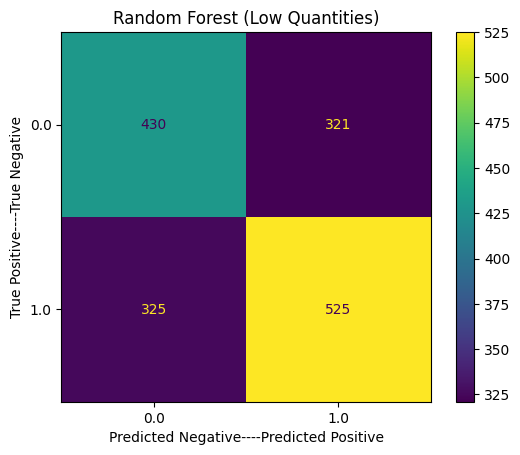

<Figure size 640x480 with 0 Axes>

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
dispL = ConfusionMatrixDisplay(confusion_matrix=cmhiggsLow, display_labels=classifierLR.classes_)
dispL.plot()
plt.ylabel('True Positive----True Negative')
plt.xlabel('Predicted Negative----Predicted Positive')
plt.title('Random Forest (Low Quantities)')
plt.show()
plt.savefig('rfl.jpg')

In [37]:
from sklearn.metrics import classification_report
print(classification_report(higgsLow_class_test, higgsLow_test_pred))

              precision    recall  f1-score   support

         0.0       0.57      0.57      0.57       751
         1.0       0.62      0.62      0.62       850

    accuracy                           0.60      1601
   macro avg       0.60      0.60      0.60      1601
weighted avg       0.60      0.60      0.60      1601



### High level quantities

In [38]:
higgsHigh_train, higgsHigh_test, higgsHigh_class_train, higgsHigh_class_test = train_test_split(higgsHigh, higgs_class, test_size = 0.2, random_state = 14)
classifierHR = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
classifierHR.fit(higgsHigh_train, higgsHigh_class_train)
higgsHigh_test_pred = classifierHR.predict(higgsHigh_test)

In [39]:
cmhiggsHigh = confusion_matrix(higgsHigh_class_test, higgsHigh_test_pred)
print(cmhiggsHigh)
accuracy_score(higgsHigh_class_test, higgsHigh_test_pred)

[[495 252]
 [264 590]]


0.6777014366021237

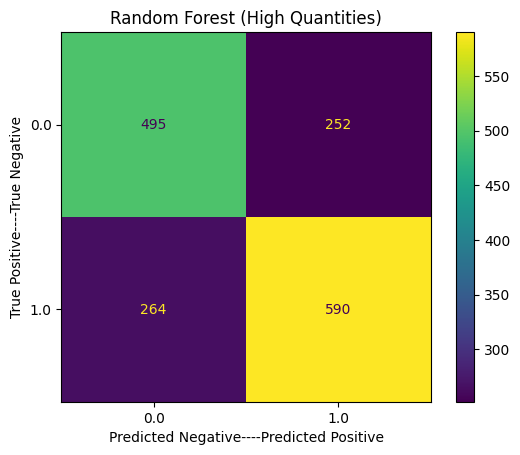

In [41]:
dispH = ConfusionMatrixDisplay(confusion_matrix=cmhiggsHigh, display_labels=classifierHR.classes_)
dispH.plot()
plt.ylabel('True Positive----True Negative')
plt.xlabel('Predicted Negative----Predicted Positive')
plt.title('Random Forest (High Quantities)')
plt.show()

In [42]:
print(classification_report(higgsHigh_class_test, higgsHigh_test_pred))

              precision    recall  f1-score   support

         0.0       0.65      0.66      0.66       747
         1.0       0.70      0.69      0.70       854

    accuracy                           0.68      1601
   macro avg       0.68      0.68      0.68      1601
weighted avg       0.68      0.68      0.68      1601



## Supervised machine Learning - Knn classification algorithm
### Low level quantities

In [43]:
# feature scaling
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
#name StandardScaler()
scaler = StandardScaler()
#call it for the data (the result is array)
higgsLow_train_scaled = scaler.fit_transform(higgsLow_train)
higgsLow_test_scaled =scaler.transform(higgsLow_test)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
#choosing the Eucledian distance (See classifier's help) 
classifierL = KNeighborsClassifier(n_neighbors = 10)#for 5 or 4 or 6 there is at least one non diagonal element greater than one diagonal
classifierL.fit(higgsLow_train_scaled, higgsLow_class_train)

KNeighborsClassifier(n_neighbors=10)

In [45]:
higgsLow_test_pred = classifierL.predict(higgsLow_test_scaled)

In [46]:
cmLowknn = confusion_matrix(higgsLow_class_test, higgsLow_test_pred)
print(cmLowknn)
accuracy_score(higgsLow_class_test, higgsLow_test_pred)

[[421 330]
 [378 472]]


0.5577763897564022

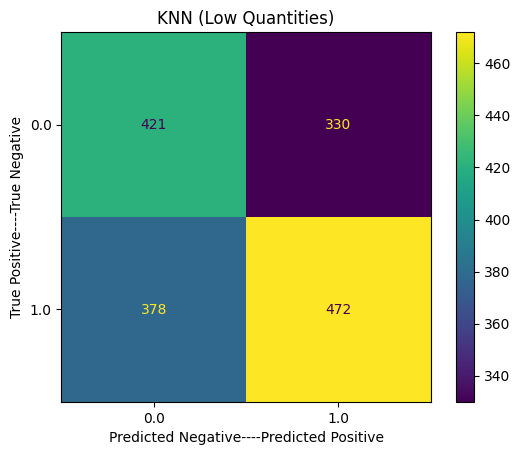

In [49]:
displk = ConfusionMatrixDisplay(confusion_matrix=cmLowknn, display_labels=classifierL.classes_)
displk.plot()
plt.ylabel('True Positive----True Negative')
plt.xlabel('Predicted Negative----Predicted Positive')
plt.title('KNN (Low Quantities)')
plt.show()

In [50]:
print(classification_report(higgsLow_class_test, higgsLow_test_pred))

              precision    recall  f1-score   support

         0.0       0.53      0.56      0.54       751
         1.0       0.59      0.56      0.57       850

    accuracy                           0.56      1601
   macro avg       0.56      0.56      0.56      1601
weighted avg       0.56      0.56      0.56      1601



### High level quantities

In [51]:
higgsHigh_train_scaled = scaler.fit_transform(higgsHigh_train)
higgsHigh_test_scaled =scaler.transform(higgsHigh_test)

In [52]:
classifierH = KNeighborsClassifier(n_neighbors = 5)#for 6 the accuracy is lower
classifierH.fit(higgsHigh_train_scaled, higgsHigh_class_train)
higgsHigh_test_pred = classifierH.predict(higgsHigh_test_scaled)

In [53]:
cmHighknn = confusion_matrix(higgsHigh_class_test, higgsHigh_test_pred)
print(cmHighknn)
accuracy_score(higgsHigh_class_test, higgsHigh_test_pred)

[[464 283]
 [241 613]]


0.6727045596502186

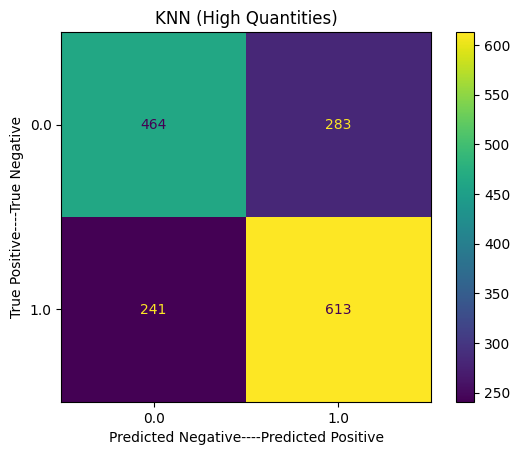

In [54]:
disphk = ConfusionMatrixDisplay(confusion_matrix=cmHighknn, display_labels=classifierH.classes_)
disphk.plot()
plt.title('KNN (High Quantities)')
plt.ylabel('True Positive----True Negative')
plt.xlabel('Predicted Negative----Predicted Positive')
plt.show()


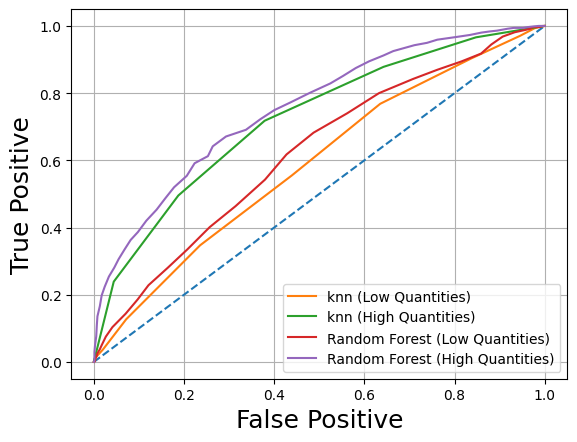

In [55]:
#ROC curve and AUC
from sklearn.metrics import roc_curve,roc_auc_score

y_pred_prob_knnL = classifierL.predict_proba(higgsLow_test_scaled)

fprl, tprl, thresholdsL = roc_curve(higgsLow_class_test, y_pred_prob_knnL[:,1])

y_pred_prob_knnH = classifierH.predict_proba(higgsHigh_test_scaled) 

fprH, tprH, thresholdsH = roc_curve(higgsHigh_class_test, y_pred_prob_knnH[:,1])

y_pred_prob_RL = classifierLR.predict_proba(higgsLow_test) 

fprRL, tprRL, thresholdsRL = roc_curve(higgsLow_class_test, y_pred_prob_RL[:,1])

y_pred_prob_RH = classifierHR.predict_proba(higgsHigh_test) 

fprRH, tprRH, thresholdsRH = roc_curve(higgsHigh_class_test, y_pred_prob_RH[:,1])


plt.plot([0,1],[0,1],'--')
plt.plot(fprl, tprl, label="knn (Low Quantities)")
plt.plot(fprH, tprH, label="knn (High Quantities)")
plt.plot(fprRL, tprRL, label="Random Forest (Low Quantities)")
plt.plot(fprRH, tprRH, label="Random Forest (High Quantities)")


plt.xlabel('False Positive', fontsize=18)
plt.ylabel('True Positive', fontsize=18)
plt.grid()
plt.legend(fontsize=10)


## Artificial Neural Networks - Tensorflow
### Low level quantities

In [59]:
higgsLow_train_scaled = scaler.fit_transform(higgsLow_train)
higgsLow_test_scaled =scaler.transform(higgsLow_test)

Building the ANN

In [60]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [61]:
ann = tf.keras.models.Sequential()

In [62]:
ann.add(Input(shape=(21,)))  # This is the Input layer

In [63]:
ann.add(tf.keras.layers.Dense(30, activation='relu'))

2024-07-11 01:16:28.323305: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


In [64]:
ann.add(tf.keras.layers.Dense(21, activation='relu')) # This is the second layer

In [65]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # This is the output layer

Training the ANN

In [66]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [67]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 21)             │           651 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,333 (5.21 KB)

 Trainable params: 1,333 (5.21 KB)

 Non-trainable params: 0 (0.00 B)

-On the training set

In [68]:
ann.fit(higgsLow_train_scaled, higgsLow_class_train, batch_size = 16, epochs = 150)

Epoch 1/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5187 - loss: 0.7031
Epoch 2/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5716 - loss: 0.6749
Epoch 3/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5899 - loss: 0.6639
Epoch 4/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6073 - loss: 0.6576
Epoch 5/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6177 - loss: 0.6491
Epoch 6/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6222 - loss: 0.6500
Epoch 7/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6363 - loss: 0.6406
Epoch 8/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6438 - loss: 0.6310
Epoch 9/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6450 - loss: 0.6296
Epoch 10/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6466 - loss: 0.6171
Epoch 11/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6363 - loss: 0.6269
Epoch 12/150
400/400 ━━━━━━━━━━━━━━━━━━━━

Predicing the test set results

In [69]:
higgsLow_class_pred = ann.predict(higgsLow_test_scaled)
higgsLow_class_pred

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.15311135],
       [0.06139448],
       [0.8420384 ],
       ...,
       [0.386548  ],
       [0.5069108 ],
       [0.07767178]], dtype=float32)

In [70]:
higgsLow_class_pred = (higgsLow_class_pred > 0.5)
higgsLow_class_pred

array([[False],
       [False],
       [ True],
       ...,
       [False],
       [ True],
       [False]])

Confusion Matrix

In [71]:
cmLowANN = confusion_matrix(higgsLow_class_test, higgsLow_class_pred)
print(cmLowANN)
accuracy_score(higgsLow_class_test, higgsLow_class_pred)

[[376 375]
 [321 529]]


0.5652717051842598

In [75]:
loss, accuracy = ann.evaluate(higgsLow_test_scaled, higgsLow_class_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5830 - loss: 0.8600
Test loss: 0.9020504355430603
Test accuracy: 0.5652716755867004


### High Level Quantites

In [76]:
higgsHigh_train_scaled = scaler.fit_transform(higgsHigh_train)
higgsHigh_test_scaled =scaler.transform(higgsHigh_test)

Building the ANN

In [77]:
ann = tf.keras.models.Sequential()
ann.add(Input(shape=(7,)))  # This is the Input layer
ann.add(tf.keras.layers.Dense(30, activation='relu'))
ann.add(tf.keras.layers.Dense(21, activation='relu')) # This is the second layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # This is the output layer

Training the ANN

In [78]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 30)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 21)             │           651 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 913 (3.57 KB)

 Trainable params: 913 (3.57 KB)

 Non-trainable params: 0 (0.00 B)

-On the training set

In [79]:
ann.fit(higgsHigh_train_scaled, higgsHigh_class_train, batch_size = 16, epochs = 150)

Epoch 1/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5998 - loss: 0.6699
Epoch 2/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6343 - loss: 0.6394
Epoch 3/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6486 - loss: 0.6246
Epoch 4/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6569 - loss: 0.6104
Epoch 5/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6682 - loss: 0.6050
Epoch 6/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6808 - loss: 0.5815
Epoch 7/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6865 - loss: 0.5861
Epoch 8/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6799 - loss: 0.5890
Epoch 9/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6884 - loss: 0.5824
Epoch 10/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6937 - loss: 0.5725
Epoch 11/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6970 - loss: 0.5703
Epoch 12/150
400/400 ━━━━━━━━━━━━━━━━━━━━

Predicing the test set results

In [80]:
higgsHigh_class_pred = ann.predict(higgsHigh_test_scaled)
higgsHigh_class_pred

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[0.8672614 ],
       [0.06374311],
       [0.37509853],
       ...,
       [0.26286748],
       [0.20457117],
       [0.38304454]], dtype=float32)

In [81]:
higgsHigh_class_pred = (higgsHigh_class_pred > 0.5)
higgsHigh_class_pred

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

Confusion Matrix

In [82]:
cmHighANN = confusion_matrix(higgsHigh_class_test, higgsHigh_class_pred)
print(cmHighANN)
accuracy_score(higgsHigh_class_test, higgsHigh_class_pred)

[[519 228]
 [276 578]]


0.6851967520299813

In [83]:
loss, accuracy = ann.evaluate(higgsHigh_test_scaled, higgsHigh_class_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6979 - loss: 0.5750
Test loss: 0.5833720564842224
Test accuracy: 0.6851967573165894
